In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ode

# Phugoid Model of a Glider

The purpose of this notebook was to recreate the model described by Lorena Barba's tutorial on a glider's flight path.  From her free body diagram of a glider, I re-traced her work as she hashed out the equations of motion for her solution using Euler's method.  Using those equations, I was able to use the Rk4 methods covered in this section to obtain similar results when the inital conditions match up.

In [2]:
def phugoid_motion(x0, t):
    g = 9.8   #gravity
    trimv = 30  #trim velocity m/s
    clift = 1  #lift coefficient
    cdrag = 1/40  #drag coefficient
    dxdt = np.empty(4)
    v = x0[0]      #forward velocity
    theta = x0[1]   #angle of trajectory
    x = x0[2]      #x position
    y = x0[3]      #y position
    dxdt[0] = -g*np.sin(theta)-cdrag/clift*g/trimv**2*v**2
    dxdt[1] = -g*np.cos(theta)/v+g/trimv**2*v
    dxdt[2] = v*np.cos(theta)
    dxdt[3] = v*np.sin(theta)

    
    return dxdt

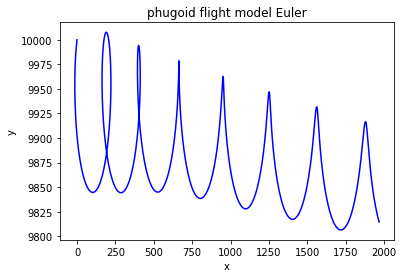

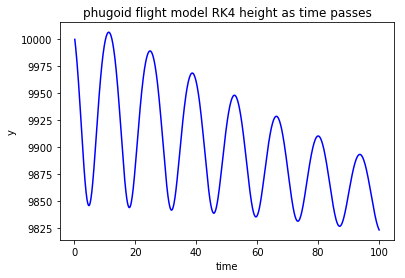

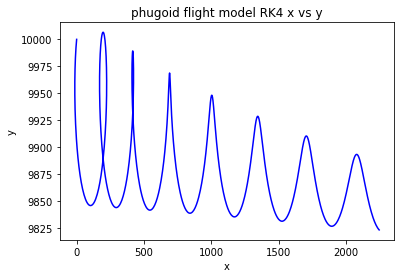

In [9]:
### define variables ###
trimv = 30  #trim velocity m/s
t = 0.0   #length of time interval
dt = .1   #time step
N = 100  #number of iterations(time steps)
i=0   #loop control variable
###

### initial conditions ###
v0 = trimv
theta0 = 180
x0 = 0
y0 = 10000
time=[]
###

### set initial conditions ###
#x0_euler = np.empty((N,4))
#x0_rk2 = np.empty((N,4))
#x0_rk4 = np.empty((N,4))

x0_euler = np.array([v0, theta0, x0, y0])
x0_rk2 = np.array([v0, theta0, x0, y0])
x0_rk4 = np.array([v0, theta0, x0, y0])
###

### set up lists to hold x and y position ###
xp_euler, yp_euler, xp_rk2, yp_rk2, xp_rk4, yp_rk4 = [],[],[],[],[],[]

while (i<N):
    xp_euler.append(x0_euler[2])
    yp_euler.append(x0_euler[3])
    xp_rk2.append(x0_rk2[2])
    yp_rk2.append(x0_rk2[3])
    xp_rk4.append(x0_rk4[2])
    yp_rk4.append(x0_rk4[3])


    x_euler = ode.Euler(phugoid_motion, x0_euler, t, dt)
    x_rk2 = ode.RK2(phugoid_motion, x0_rk2, t, dt)
    x_rk4 = ode.RK4(phugoid_motion, x0_rk4, t, dt)
    
 
    x0_euler = x_euler
    x0_rk2 = x_rk2
    x0_rk4 = x_rk4
    i = i+dt
    time.append(i)
    
    

    
#print (len(xp_euler))
plt.figure()
plt.title("phugoid flight model Euler")
plt.plot(xp_euler,yp_euler,"b-")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.figure()
plt.title("phugoid flight model RK4 height as time passes")
plt.plot(time,yp_rk4,"b-")
plt.xlabel("time")
plt.ylabel("y")
plt.show()

plt.figure()
plt.title("phugoid flight model RK4 x vs y")
plt.plot(xp_rk4,yp_rk4,"b-")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


From the following graphs we can see that the glider under these initial conditions both starts with a loop de loop and then oscillates between nosediving down and pulling up as time passes.